<a href="https://colab.research.google.com/github/antoninifabio/BHBdynamics/blob/master/Assignment_1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment_1: Estimating the Mass of the Black Hole in Cygnus X-1**

This is due in on Friday November 15th before 2pm. Mark weighting is in brackets. Do add comments to your code, justifying all your steps and decisions. You will lose points if your code is hard to understand: code-only submissions without comments or justifications for the steps taken will only get half marks. Graphs without labels (or units when appropriate) are not worth any point.

Save your work to GitHub after having run all cells with Runtime->Restart and run all. Don't change the filename: git will save all the change history, there's no risk of overwriting.

It is recommended to only attempt this assignment after having gone through  week4 sheet.

Cygnus X-1 is one of the most studied X-ray binary systems, known for being one of the strongest candidates for hosting a stellar-mass black hole. This system consists of a massive companion star (HDE 226868) and an unseen companion, which is widely accepted to be a black hole due to its inferred mass. The black hole's presence is suggested by the powerful X-ray emissions resulting from material accreted from the companion star into the black hole's accretion disk.

One of the primary methods used to estimate the mass of the black hole in such systems is through radial velocity measurements of the companion star. As the companion star orbits the black hole, its velocity along the line of sight changes, causing Doppler shifts in the star's spectral lines. By analyzing these shifts over time, we can determine the orbital parameters of the system and, ultimately, estimate the mass of the black hole.

In this assignment, you will simulate the work of astronomers by analyzing synthetic radial velocity data from the Cygnus X-1 system.

By the end of this assignment, you will have a deeper understanding of how astronomers use radial velocity data to infer the presence and mass of black holes in binary systems. You'll also gain practical experience in data analysis, curve fitting, and applying astrophysical principles to real-world problems.

Points awarded per question are indicated inside the square brackets.

**Exercise 1**

**[2]** Use the provided data file RV_Cygnus-X1.csv containing  time (in days), radial velocity (in km/s), and uncertainties (aslso in km/s).

Using matplotlib, plot the radial velocity data against time. Include error bars representing the uncertainties in the measurements. This plot will allow you to visually inspect the periodic nature of the radial velocity variations, which are indicative of the companion star's orbit around the black hole.



**Marking schem**:

[1] for reading the file, [1] for plot

In [1]:
#import all the needed packages
import numpy as np
from scipy.optimize import curve_fit
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

In [5]:
# download file using wget, or download from GitHub repository on your device
!wget https://raw.githubusercontent.com/PX2134-2024/assignment-1-antoninifabio/refs/heads/main/RV_Cygnus-X1.csv?token=GHSAT0AAAAAACZI4DCEXFJAT5I2SEA3TYHIZZ4NL5A

--2024-11-19 10:38:59--  https://raw.githubusercontent.com/PX2134-2024/assignment-1-antoninifabio/refs/heads/main/RV_Cygnus-X1.csv?token=GHSAT0AAAAAACZI4DCEXFJAT5I2SEA3TYHIZZ4NL5A
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2339 (2.3K) [text/plain]
Saving to: ‘RV_Cygnus-X1.csv?token=GHSAT0AAAAAACZI4DCEXFJAT5I2SEA3TYHIZZ4NL5A’

RV_Cygnus-X1.csv?to 100%[===================>]   2.28K  --.-KB/s    in 0s      

2024-11-19 10:39:00 (34.2 MB/s) - ‘RV_Cygnus-X1.csv?token=GHSAT0AAAAAACZI4DCEXFJAT5I2SEA3TYHIZZ4NL5A’ saved [2339/2339]



In [6]:
#read data
data = pd.read_csv('RV_Cygnus-X1.csv')

#place them in arrays
time = data.time
velocity = data.velocity
verr=data.uncertainty



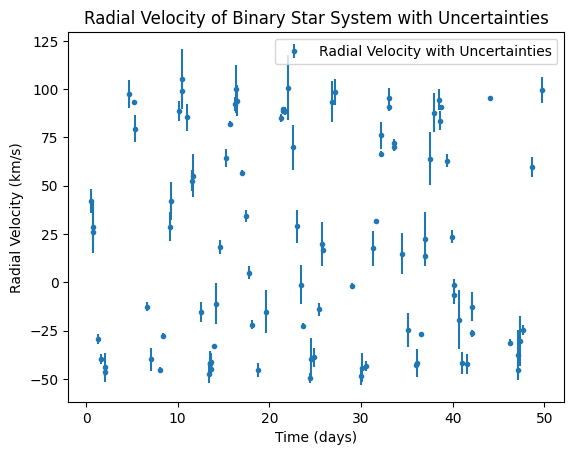

In [7]:
#plot velocity vs time with error bars
plt.errorbar(time, velocity, verr, fmt='.', label='Radial Velocity with Uncertainties')
plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (km/s)')
plt.title('Radial Velocity of Binary Star System with Uncertainties')
plt.legend()
plt.show()

**Exercise 2**

**[3]** Before proceeding with the curve fitting process, compute the following key quantities from the raw radial velocity data. Avoid any reliance on visual estimation and perform these calculations programmatically to ensure accuracy.

1) The time difference between any two consecutive maxima in the radial velocity, and the average value of this difference over the obervational period. This should give you a reasonably good estimate of the binary orbital period.

2) The semi-amplitude of the velocity variations;

3) Mean of the Radial Velocity across the enitre observation.

Check from your radial velocity plot if the numbers you have derived make sense before proceeding to the next step.



**Marking scheme:**

[1] point for doing (1) correctly, [1] for doing (2) correctly and [1] for doing (3) correctly


In [8]:
#use the library fine_peaks or any other method to find the peaks
peaks, _ = find_peaks(velocity, prominence=5, distance=10)
first_two_peaks = peaks[:2]
x_diff = np.diff(time[first_two_peaks])[0]

#compute the mean of the difference over the observation
mean_diff= np.mean(np.diff(time[peaks]))

print('difference between first two peaks:',x_diff.round(4),'days')
print('mean difference over observational period:',mean_diff.round(4),'days')


difference between first two peaks: 5.8142 days
mean difference over observational period: 5.6235 days


In [10]:
#compute the maximum of the first peak
max_velocity=velocity[first_two_peaks[0]]  #amplitude
print('maximum of the first peak:', max_velocity,'km/s')


maximum of the first peak: 97.5295 km/s


In [11]:
#mean of the radial velocity
offset = np.mean(velocity)

print('mean of the radial velocity is:',offset.round(4),'km/s')

mean of the radial velocity is: 21.8219 km/s


In [12]:
#compute a proxi for the semi-amplitude of the first peak
#this is the
amplitude=max_velocity-offset  #amplitude
print('the semi-amplitude of the velocity variations is:',amplitude,'km/s')

the semi-amplitude of the velocity variations is: 75.70762099999999 km/s


**Exercise 3**

**[5]** Using the $\tt curve\_fit$ function from the $\tt scipy.optimize$ library, fit the radial velocity data to a sinusoidal model that represents a circular orbit to find the orbital period ($P$), the radial velocity semi-amplitude ($K$), and the systemic velocity ($\gamma$) of the system and their uncertainties. Write the sinusoidal model as a python function which you will call from $\tt curve\_fit$ as seen in class.

 Use your initial estimates from Excercise 2 as the first guess for the fitting process. The fitted parameters will provide more accurate values for $P$, $K$, and $γ$ and for their uncertainties. We will use these in the next excercises to calculate the mass of the black hole!

Make a figure that shows: (i) the radial velocity curve data (with error bars); (ii) your sinusoidal model using your initial guesses; and (iii) your sinusoidal model using the parameters from the fit.

**Marking scheme:**

[1] for writing the function correctly, [1] for using the function correctly, [2] for using curve_fit correctly, [1] for plotting

In [19]:
# create the function we want to fit
def my_sin(x, period, amplitude, phase, offset):
    return np.sin((2*np.pi/period)*(x-phase)) * amplitude + offset



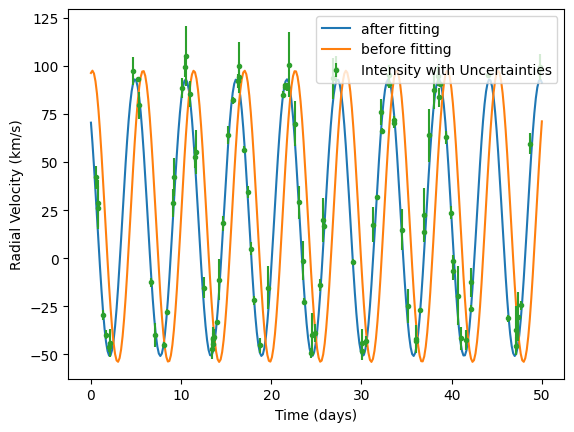

In [20]:
#put initial guesses here
p0=[mean_diff, amplitude,10, offset] # any initial guess for the phase will work

# now do the fit
popt,popcov = curve_fit(my_sin, time, velocity, sigma=verr, p0=p0)

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_sin(time, *p0)

# recreate the fitted curve using the optimized parameters
time_plot = np.linspace(0, 50, 300)
plt.plot(time_plot,my_sin(time_plot, *popt), label='after fitting')
plt.plot(time_plot,my_sin(time_plot, *p0), label='before fitting')

plt.errorbar(time, velocity, np.abs(verr), fmt='.', label='Intensity with Uncertainties')

plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (km/s)')
plt.legend()
plt.show()


**Exercise 4**

**[5]** With the fitted orbital parameters, calculate the mass function $f(M)$ of the binary system. Calculate the uncertaintiy associated with this estimate by downloading and using the module $\tt uncertainties$. The mass function is given by:

$f(M)=$$P{K^3\over 2πG}$


where $G$ is the gravitational constant.

Use Kepler's third law to show that the mass function provides a lower limit on the mass of the black hole. (This part of the exercise in not marked)


Now assume an inclination angle of the orbit with respect to the line of sight of $i=45^\circ ±15 ^\circ$ and a companion mass $M_2=(40±10)M_\odot$​. Use this to compute the mass of the black hole and the uncertainty on this estimate.

**Marking scheme:**

[1] for installing uncertainties package, [1] for calculating uncertainty on period correctly, [1] for calculating uncertainty on amplitude correctly, [1] for computing mass function correctly, [1] for computing BH mass with uncertainties (**if the function used is incorrect do not take points off**)

In [15]:
#install package uncertainties
! pip install -q uncertainties

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00


In [18]:
import uncertainties as uc
import uncertainties.umath as um

# compute error estimates for the period and amplitude of the orbit
fitted_period = uc.ufloat(popt[0],np.sqrt(np.diag(popcov))[0])*(24*60*60)  # Period
fitted_amplitude = uc.ufloat(popt[1],np.sqrt(np.diag(popcov))[1])  # Radial velocity semi-amplitude K

# This is the conversion factor that I will use to convert in Soar units
conversion_to_SolarM=7.50904416e-12

#compute mass function using provided formula
mass_function = conversion_to_SolarM*(fitted_period * (np.abs(fitted_amplitude)**3)) / (2 * np.pi)

#compute approximation of BH mass from the mass_function assuming companion mass >> than BH mass
mass_BH=(mass_function*uc.ufloat(40.,10)**2)**(1/3)/uc.ufloat(np.sin(np.radians(45)),np.sin(np.radians(10)))
print(f"Mass function (f(M)): {mass_function.nominal_value} solar masses",mass_function.std_dev)
print("BH mass:",mass_BH, 'Solar masses')

Mass function (f(M)): 0.21571923293328704 solar masses 0.00369797853761377
BH mass: 9.9+/-2.9 Solar masses


### Extra Exercise (not marked): Fitting Radial Velocity Data for an Eccentric Orbit.

For a more advanced challenge, we will extend the analysis to consider an eccentric binary.

Download the radial velocity measurement data for the companion star of the unseen object, provided in the file RV_eccentric.csv

**TASK 1**   - Adapt the radial velocity model to account for orbital eccentricity. The radial velocity of the companion star in an eccentric orbit can be modeled as:


   
   $v(t) = K \left[\cos(\theta(t) + \omega) + e \cos(\omega)\right] + \gamma$
   
   
   Where:
   - $ K $ is the semi-amplitude of the radial velocity curve.
   - $ \theta(t)$ is the true anomaly, which depends on the eccentricity $e$ and the orbital phase.
   - $\omega$ is the argument of periastron.
   - $e$ is the eccentricity of the orbit.
   - $\gamma$ is the systemic velocity.
   - $t$ is the time of observation.


**TASK 2**
 **Calculate the True Anomaly**:
   - The true anomaly $\theta(t)$ is related to the eccentric anomaly $E(t)$  by:

$   \tan\left(\frac{\theta}{2}\right) = \sqrt{\frac{1+e}{1-e}} \tan\left(\frac{E}{2}\right)$


   Where  $E(t)$ is obtained by solving (numerically) Kepler's equation:


   $
   M(t) = E(t) - e \sin(E(t))
   $


   where $M(t)$ is the mean anomaly.

**TASK 3** **Estimate Orbital Parameters**:
   - Start with the same initial estimates as before, and include reasonable estimates for the eccentricity $e$ and argument of periastron $\omega$.

**TASK 4** **Fit the Data**:
   - Use `curve_fit` to fit the radial velocity data to the eccentric orbit model. The fitting process will yield the orbital period $P$, semi-amplitude $K$, eccentricity $e$, argument of periastron $\omega$, and systemic velocity $\gamma$, along with their associated uncertainties.





In [ ]:
# Define new model function for curve fitting
def radial_velocity_model(t, P, K, e, omega, T0,gamma):
    # Mean anomaly
    M = 2 * np.pi / P * (t - T0)
    # Solve Kepler's equation for Eccentric Anomaly (E)
    E = solve_kepler(M, e)
    # True anomaly
    theta = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2), np.sqrt(1 - e) * np.cos(E / 2))
    # Radial velocity
    return K * (np.cos(theta + omega) + e * np.cos(omega))+gamma


In [ ]:
# Solve Kepler's equation for Eccentric Anomaly (E)
def solve_kepler(M, e, tol=1e-6):
    E = M  # Initial guess: E = M
    for _ in range(100):
        E_new = M + e * np.sin(E)
        if np.all(np.abs(E_new - E) < tol):
            break
        E = E_new
    return E

In [ ]:
!wget https://raw.githubusercontent.com/PX2134-2024/assignment-1-antoninifabio/refs/heads/main/RV_eccentric.csv?token=GHSAT0AAAAAACWAABSAJSGF6FJQGBHBDUXIZXWVLSA

--2024-09-27 12:53:06--  https://raw.githubusercontent.com/PX2134-2024/assignment-1-antoninifabio/refs/heads/main/RV_eccentric.csv?token=GHSAT0AAAAAACWAABSAJSGF6FJQGBHBDUXIZXWVLSA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2197 (2.1K) [text/plain]
Saving to: ‘RV_eccentric.csv?token=GHSAT0AAAAAACWAABSAJSGF6FJQGBHBDUXIZXWVLSA’

RV_eccentric.csv?to 100%[===================>]   2.15K  --.-KB/s    in 0s      

2024-09-27 12:53:07 (23.0 MB/s) - ‘RV_eccentric.csv?token=GHSAT0AAAAAACWAABSAJSGF6FJQGBHBDUXIZXWVLSA’ saved [2197/2197]



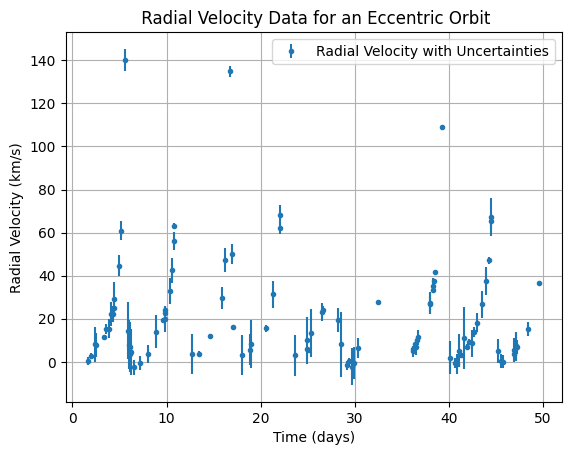

In [ ]:

#read data
data = pd.read_csv('RV_eccentric.csv')

#place them in arrays
time = data.time
velocity = data.velocity
verr=data.uncertainty

plt.errorbar(time, velocity, verr, fmt='.', label='Radial Velocity with Uncertainties')

plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (km/s)')
plt.title(' Radial Velocity Data for an Eccentric Orbit')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#initial guesses
initial_guess=[mean_diff, amplitude,0.5,1.,0.,20.]


Fitted Period P: 5.600 ± 0.000 days
Fitted Semi-Amplitude K: 71.038 ± 0.551 km/s
Fitted Eccentricity e: 0.797 ± 0.001
Fitted Argument of Periastron ω: 0.494 ± 0.005 radians
Fitted Time of Periastron Passage T0: -0.003 ± 0.003 days
Fitted shift: 20.146 ± 0.075 days


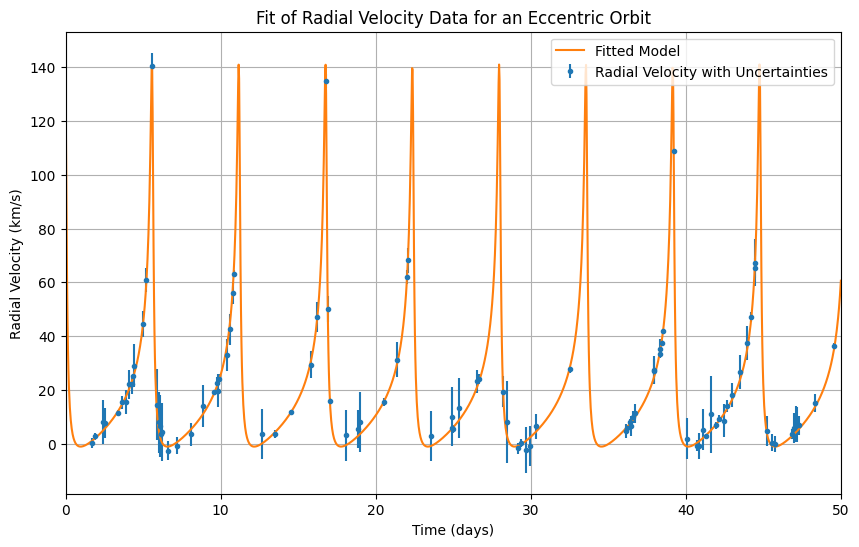

In [ ]:
# Fit the model to the data
popt, pcov = curve_fit(radial_velocity_model, time, velocity,sigma=verr,p0=initial_guess)

# Extract fitted parameters and their uncertainties
P_fit, K_fit, e_fit, omega_fit, T0_fit,gamma_fit = popt
P_err, K_err, e_err, omega_err, T0_err,gamma_err = np.sqrt(np.diag(pcov))

# Print fitted parameters and uncertainties
print(f"Fitted Period P: {P_fit:.3f} ± {P_err:.3f} days")
print(f"Fitted Semi-Amplitude K: {K_fit:.3f} ± {K_err:.3f} km/s")
print(f"Fitted Eccentricity e: {e_fit:.3f} ± {e_err:.3f}")
print(f"Fitted Argument of Periastron ω: {omega_fit:.3f} ± {omega_err:.3f} radians")
print(f"Fitted Time of Periastron Passage T0: {T0_fit:.3f} ± {T0_err:.3f} days")
print(f"Fitted shift: {gamma_fit:.3f} ± {gamma_err:.3f} days")

# Plot the fitted model vs data
plt.figure(figsize=(10, 6))
time_range = np.linspace(0, 300, 10000)

plt.errorbar(time, velocity, verr, fmt='.', label='Radial Velocity with Uncertainties')
plt.plot(time_range, radial_velocity_model(time_range, *popt), '-', label='Fitted Model')
plt.xlim(0, 50)

plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (km/s)')
plt.title('Fit of Radial Velocity Data for an Eccentric Orbit')
plt.legend()
plt.grid(True)
plt.show()
